In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DemoGraphicDataPATH = "/Users/megantabbutt/BRT_data/DemographicData/csv_pwi/psam_p55_5.csv"
TimeTableConversionPATH = "/Users/megantabbutt/BRT_data/DemographicData/TimeConversiontable.csv"

In [3]:
timeConversionTable = pd.read_csv(TimeTableConversionPATH, header=None, index_col=1)
DemoGraphicData = pd.read_csv(DemoGraphicDataPATH)

/Users/megantabbutt/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
DemoGraphicData

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2014000000016,3,1,1401,2,55,1070673,23,34,...,7,37,18,34,28,7,24,6,40,7
1,P,2014000000016,3,2,1401,2,55,1070673,20,13,...,7,37,20,34,20,6,21,6,38,7
2,P,2014000000016,3,3,1401,2,55,1070673,26,9,...,8,41,24,44,27,8,29,8,50,10
3,P,2014000000016,3,4,1401,2,55,1070673,27,38,...,9,45,25,45,30,8,27,7,51,9
4,P,2014000000024,3,1,1601,2,55,1070673,7,46,...,11,6,7,7,1,7,1,6,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294583,P,2018HU1400669,3,1,1400,2,55,1013097,5,65,...,1,2,4,4,5,4,6,1,5,1
294584,P,2018HU1400669,3,2,1400,2,55,1013097,5,63,...,1,2,4,5,5,4,7,1,4,1
294585,P,2018HU1400721,3,1,55101,2,55,1013097,13,87,...,5,13,23,20,10,5,23,4,13,13
294586,P,2018HU1400758,3,1,1301,2,55,1013097,7,71,...,15,14,8,7,10,6,7,13,10,7


In [5]:
timeConvertDict = timeConversionTable.to_dict()[0]

In [6]:
whiteBoolean = list(DemoGraphicData['RACWHT'])
print("Ratio white: ", np.average(whiteBoolean))

blackBoolean = list(DemoGraphicData['RACBLK'])
print("Ratio black: ", np.average(blackBoolean))

hispanicBoolean = [1 if i > 1 else 0 for i in list(DemoGraphicData['HISP'])]
print("Ratio hispanic: ", np.average(hispanicBoolean))

asianBoolean = (DemoGraphicData['RACASN'])
print("Ratio asian: ", np.average(asianBoolean))

Ratio white:  0.9266263391584179
Ratio black:  0.042157182234171114
Ratio hispanic:  0.03944152511303923
Ratio asian:  0.020136597553192935


In [7]:
whiteBoolean_TF = []
for i in whiteBoolean:
    if i==1:
        whiteBoolean_TF.append(True)
    else:
        whiteBoolean_TF.append(False)
print(np.average(whiteBoolean_TF))
whiteData = DemoGraphicData[whiteBoolean_TF]

0.9266263391584179


In [8]:
blackBoolean_TF = []
for i in blackBoolean:
    if i==1:
        blackBoolean_TF.append(True)
    else:
        blackBoolean_TF.append(False)
print(np.average(blackBoolean_TF))
blackData = DemoGraphicData[blackBoolean_TF]

0.042157182234171114


In [9]:
hispanicBoolean_TF = []
for i in hispanicBoolean:
    if i==1:
        hispanicBoolean_TF.append(True)
    else:
        hispanicBoolean_TF.append(False)
print(np.average(hispanicBoolean_TF))
hispanicData = DemoGraphicData[hispanicBoolean_TF]

0.03944152511303923


In [10]:
asianBoolean_TF = []
for i in asianBoolean:
    if i==1:
        asianBoolean_TF.append(True)
    else:
        asianBoolean_TF.append(False)
print(np.average(asianBoolean_TF))
asianData = DemoGraphicData[asianBoolean_TF]

0.020136597553192935


In [11]:
hours = [i for i in range(24)]

def getDictHours(data):
    DataHours = dict()
    for i in hours:
        DataHours[i] = 0

    for i in data:
        if i >=1.0 and i <= 150.0:
            hourTime = timeConvertDict[int(i)]
            DataHours[hourTime] += 1
    return DataHours
            
whiteDataHours = getDictHours(whiteData['JWDP'])
blackDataHours = getDictHours(blackData['JWDP'])
hispanicDataHours = getDictHours(hispanicData['JWDP'])
asianDataHours = getDictHours(asianData['JWDP'])

In [37]:
# Get the wieghts:

DemographicsWeightsHours = {'White':[], 'Black':[], 'Hispanic':[], 'Asian':[]}
ErrorsUpper = {'White':[], 'Black':[], 'Hispanic':[], 'Asian':[]}
ErrorsLower = {'White':[], 'Black':[], 'Hispanic':[], 'Asian':[]}

totalPeople = len(DemoGraphicData)
expectedWhitesRatio = np.average(whiteBoolean_TF)
expectedBlacksRatio = np.average(blackBoolean_TF)
expectedHispanicRatio = np.average(hispanicBoolean_TF)
expectedAsianRatio = np.average(asianBoolean_TF)

for hour in hours:
    wNum = whiteDataHours[hour]
    bNum = blackDataHours[hour]
    hNum = hispanicDataHours[hour]
    aNum = asianDataHours[hour]
    totalHourWorkers = wNum + bNum + hNum + aNum
    
    wWeight = wNum / (totalHourWorkers * expectedWhitesRatio)
    bWeight = bNum / (totalHourWorkers * expectedBlacksRatio)
    hWeight = hNum / (totalHourWorkers * expectedHispanicRatio)
    aWeight = aNum / (totalHourWorkers * expectedAsianRatio)
    
    DemographicsWeightsHours['White'].append(wWeight)
    DemographicsWeightsHours['Black'].append(bWeight)
    DemographicsWeightsHours['Hispanic'].append(hWeight)
    DemographicsWeightsHours['Asian'].append(aWeight)
    
    ErrorsUpper['White'].append(np.sqrt(wNum)/ ((totalHourWorkers + np.sqrt(wNum)) * expectedWhitesRatio))
    ErrorsUpper['Black'].append(np.sqrt(bNum)/ ((totalHourWorkers + np.sqrt(bNum)) * expectedBlacksRatio))
    ErrorsUpper['Hispanic'].append(np.sqrt(hNum)/ ((totalHourWorkers + np.sqrt(hNum)) * expectedHispanicRatio))
    ErrorsUpper['Asian'].append(np.sqrt(aNum)/ ((totalHourWorkers + np.sqrt(aNum)) * expectedAsianRatio))
    
    ErrorsLower['White'].append(np.sqrt(wNum)/ ((totalHourWorkers - np.sqrt(wNum)) * expectedWhitesRatio))
    ErrorsLower['Black'].append(np.sqrt(bNum)/ ((totalHourWorkers - np.sqrt(bNum)) * expectedBlacksRatio))
    ErrorsLower['Hispanic'].append(np.sqrt(hNum)/ ((totalHourWorkers - np.sqrt(hNum)) * expectedHispanicRatio))
    ErrorsLower['Asian'].append(np.sqrt(aNum)/ ((totalHourWorkers - np.sqrt(aNum)) * expectedAsianRatio))

#DemographicsWeightsHours

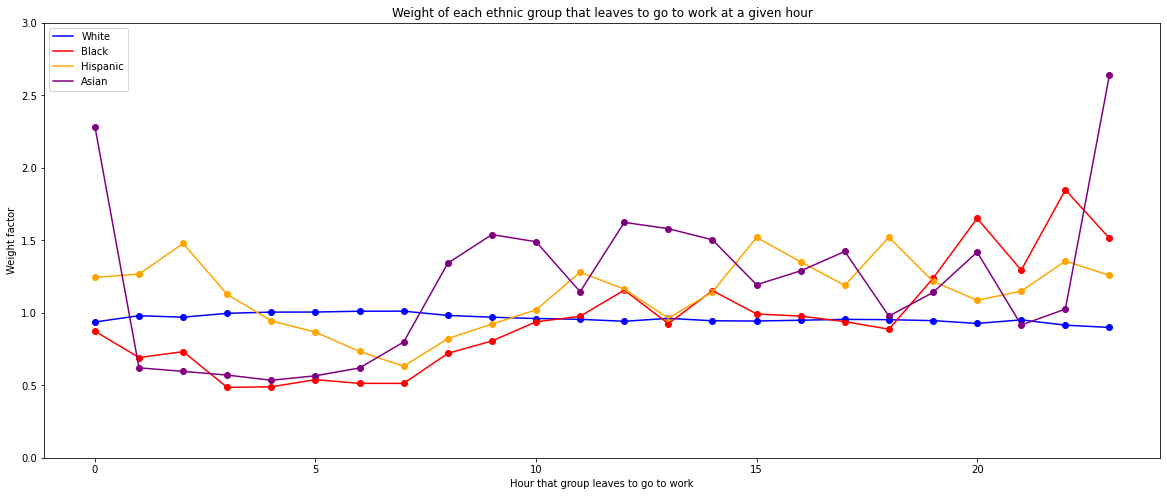

In [38]:
ax = plt.subplots(figsize=(20, 8))[1]

plt.plot(hours, DemographicsWeightsHours['White'], color='blue', label='White')
plt.scatter(hours, DemographicsWeightsHours['White'], color='blue')

plt.plot(hours, DemographicsWeightsHours['Black'], color='red', label='Black')
plt.scatter(hours, DemographicsWeightsHours['Black'], color='red')

plt.plot(hours, DemographicsWeightsHours['Hispanic'], color='orange', label='Hispanic')
plt.scatter(hours, DemographicsWeightsHours['Hispanic'], color='orange')

plt.plot(hours, DemographicsWeightsHours['Asian'], color='purple', label='Asian')
plt.scatter(hours, DemographicsWeightsHours['Asian'], color='purple')

plt.title("Weight of each ethnic group that leaves to go to work at a given hour")
plt.xlabel("Hour that group leaves to go to work")
plt.ylabel("Weight factor")
plt.ylim(0, 3)
plt.legend()

In [50]:
hoursWhite = [i for i in hours]
hoursBlack = [i-.08 for i in hours]
hoursHispanic = [i+.08 for i in hours]

In [83]:
totalWorkersHours = []
for hour in hours:
    wNum = whiteDataHours[hour]
    bNum = blackDataHours[hour]
    hNum = hispanicDataHours[hour]
    aNum = asianDataHours[hour]
    totalWorkersHours.append(wNum + bNum + hNum + aNum)
totalWorkersHours = [i*(2/max(totalWorkersHours)) for i in totalWorkersHours]

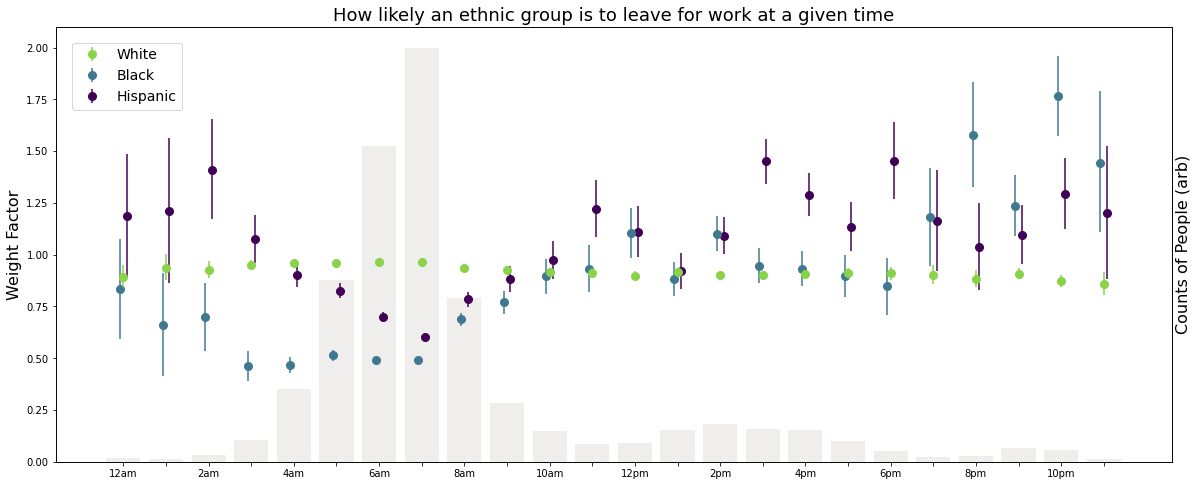

In [136]:
fig, ax1 = plt.subplots(figsize=(20, 8))

#ax = plt.subplots(figsize=(20, 8))[1]


ax1.bar(hours, totalWorkersHours, color="#e7e3e0", alpha=.6, zorder=1)

ax2 = ax1.twinx()
ax2.errorbar(hours, DemographicsWeightsHours['White'], yerr=[ErrorsUpper['White'], ErrorsLower['White']], 
             fmt='o', label='White', markersize=8, color="#89d348", zorder=3)

ax2.errorbar(hoursBlack, DemographicsWeightsHours['Black'], yerr=[ErrorsUpper['Black'], ErrorsLower['Black']], 
             fmt='o', label='Black', markersize=8, color='#3f788f', zorder=2)

ax2.errorbar(hoursHispanic, DemographicsWeightsHours['Hispanic'], 
             yerr=[ErrorsUpper['Hispanic'], ErrorsLower['Hispanic']], fmt='o', label='Hispanic', 
             markersize=8, color='#410056', zorder=1)

#plt.plot(hours, DemographicsWeightsHours['Asian'], color='purple', label='Asian')
#plt.scatter(hours, DemographicsWeightsHours['Asian'], color='purple')

ax2.set_yticks([])
ax2.set_ylabel("Counts of People (arb)", fontsize=16)


hourLabels = ["12am", " ", "2am", " ", "4am", " ", "6am", " ", "8am", " ", "10am", " ",
             "12pm", " ", "2pm", " ", "4pm", " ", "6pm", " ", "8pm", " ", "10pm", " "]
plt.xticks(hoursWhite, labels=hourLabels)
#ax1.grid(axis='x', linestyle=':', alpha=.6, zorder=0)
plt.title("How likely an ethnic group is to leave for work at a given time", fontsize=18)
plt.xlabel("Hour that group leaves to go to work", fontsize=16)
ax1.set_ylabel("Weight Factor", fontsize=16)
plt.ylim(0, 2.2)
ax2.legend(fontsize=14, bbox_to_anchor=(0.12, .98))
plt.savefig("PaperFigures/WeightFactorRaces", bbox_inches='tight', format='svg')
plt.show()